In [1]:
from fastai.vision.all import *
from tqdm import tqdm

In [2]:
dataset_path = untar_data(url=URLs.MNIST)

In [3]:
MODEL_ARCH = resnet34
BATCH_SIZE = 2048

In [4]:
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(train_name="training", valid_name="testing"),
    batch_tfms=aug_transforms(do_flip=False)
)

dataloaders = datablock.dataloaders(dataset_path, bs=BATCH_SIZE)

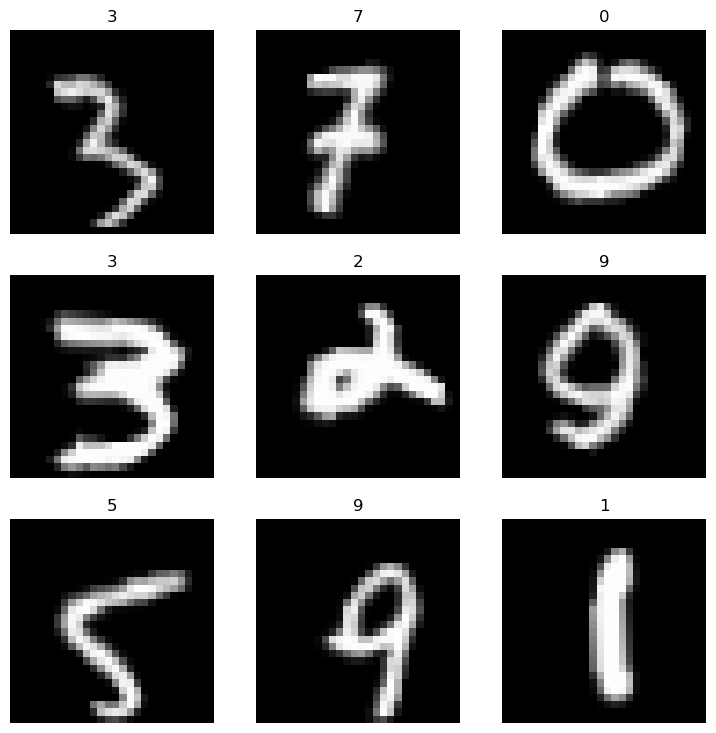

In [5]:
dataloaders.show_batch()

In [6]:
learn = vision_learner(dataloaders, MODEL_ARCH, metrics=[accuracy])

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0006918309954926372)

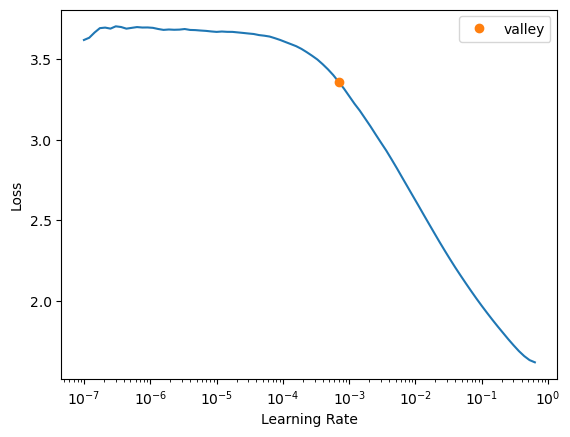

In [7]:
learn.lr_find()

In [8]:
learn.fine_tune(5, 10e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.475315,0.656990,0.782700,01:01


epoch,train_loss,valid_loss,accuracy,time
0,0.250375,0.089808,0.973500,01:04
1,0.138754,0.050841,0.984700,01:05
2,0.090871,0.040788,0.988000,01:05
3,0.063848,0.035491,0.988400,01:04
4,0.047521,0.031339,0.989800,01:04


In [9]:
interpret = ClassificationInterpretation.from_learner(learn)

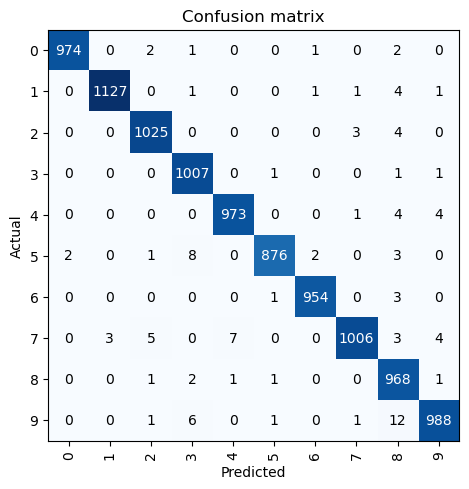

In [10]:
interpret.plot_confusion_matrix()